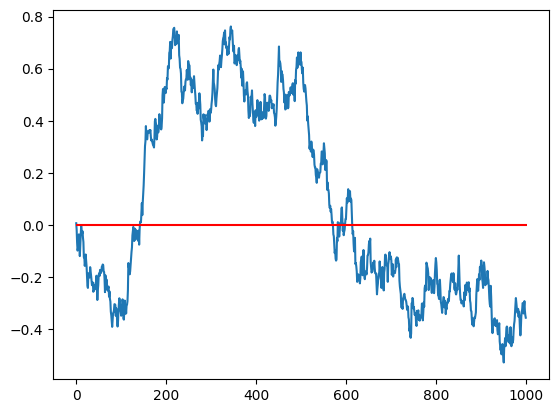

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random

N = 1000
W=0
dt = 1/1000
W_t = []
t = []

for i in range(N+1):
    W += random.gauss(0, np.sqrt(dt))
    W_t.append(W)
    t.append(i)


plt.plot(t,W_t)
plt.hlines(0,xmin=-1,xmax=1002,colors='red')

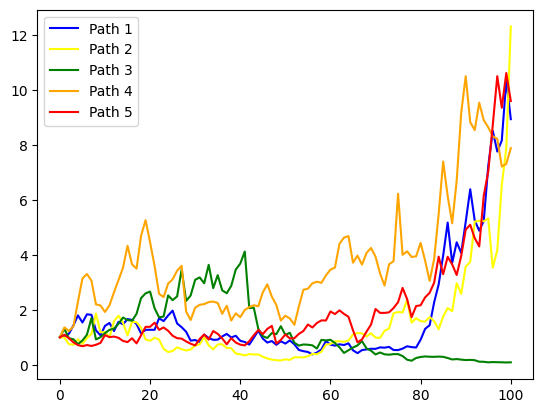

In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt

T = 100
alpha = 0.05
sigma = 0.2
S=[]
for j in range(1,6):
    s1 = [1]
    w = [0]
    t1 = [0]
    for i in range(T):
        w.append(w[-1]+random.gauss(0, 1))
        t=i+1
        exponent = sigma *  w[-1]+ (alpha - 0.5 * sigma**2) * t
        s1.append(s1[0]*np.exp(exponent))
        t1.append(t)
    S.append(s1)

colors = [ 'blue','yellow', 'green', 'orange','red']

for i in range(5):
    plt.plot(t1, S[i], color=colors[i], label=f'Path {i+1}')
    plt.legend()



In [55]:
import numpy as np
steps = 1000
paths = 10000
s = 300
t = 600
noise = np.random.randn(paths, steps)
bm = np.cumsum(noise, axis=1)
ws = bm[:, s+1]
wt = bm[:, t+1]
result = np.mean(ws * wt)
result

np.float64(500.71163324837926)

Mean=-0.011077869170688108, Variance=200.27680621158666


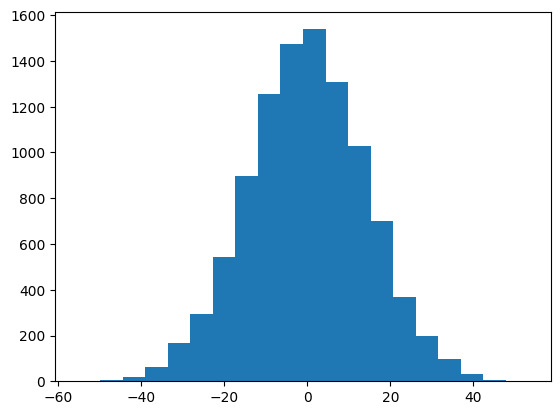

In [58]:
avg=np.mean(ws-wt)
var=np.var(ws-wt)
plt.hist(ws-wt,bins=20)
print(f'Mean={avg}, Variance={var}')

In [62]:
from scipy.stats import pearsonr
u=700
v=900
A = bm[:, t] - bm[:, s]
B = bm[:, v] - bm[:, u]
corr,unused=pearsonr(A,B)
corr

np.float64(-0.015185075083414355)

E[Wt | Ws] ≈ 0.9996220546735184 * ws + 0.011029636039610097


/tmp/ipython-input-66-1049611467.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


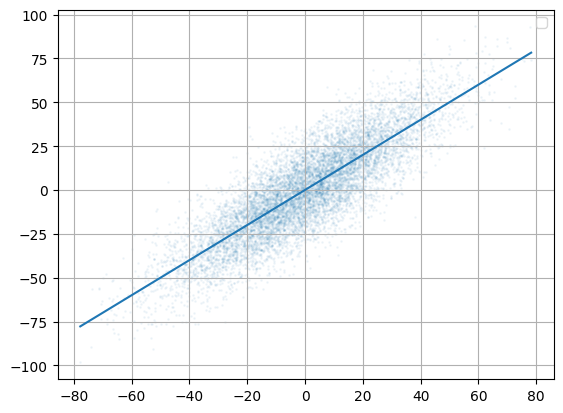

In [66]:
coeffs = np.polyfit(ws, wt, 1)
slope, intercept = coeffs

print(f"E[Wt | Ws] ≈ {slope} * ws + {intercept}")

plt.scatter(ws, wt, s=1, alpha=0.05)
x = np.linspace(min(ws), max(ws), 100)
plt.plot(x, slope * x + intercept)
plt.legend()
plt.grid(True)